In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install catboost

In [ ]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
# Importing the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Video games sales.csv', engine='python')
# Shape of dataset
data.shape

(16598, 11)

In [ ]:
data.index

RangeIndex(start=0, stop=16598, step=1)

In [ ]:
# Shuffling dataset : to remove chances of biasness of data
data= data.sample(frac= 1)
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
# Viewing first 5 rows of dataframe
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8518,8520,Midway Arcade Treasures 2,GC,2004.0,Misc,Midway Games,0.13,0.03,0.00,0.00,0.16
5363,5365,Avatar: The Last Airbender - The Burning Earth,DS,2007.0,Action,THQ,0.31,0.00,0.00,0.03,0.34
11090,11092,Prinny: Can I Really Be the Hero?,PSP,2008.0,Platform,Tecmo Koei,0.02,0.01,0.05,0.01,0.09
9724,9726,Angry Birds Star Wars,PSV,2013.0,Strategy,Activision,0.05,0.04,0.00,0.03,0.12
13385,13387,Professor Heinz Wolff's Gravity,DS,2008.0,Puzzle,Deep Silver,0.04,0.00,0.00,0.00,0.05


In [ ]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 8518 to 11885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# How many different platforms are there for video games ?
data['Platform'].nunique()

31

In [ ]:
# How many different publishers are there for video games ?
data['Publisher'].nunique()

578

In [ ]:
# Unique values in Genre column and their value counts
data.groupby('Genre').size()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64

In [ ]:
# Data cleaning
# checking duplicate values
data.duplicated().sum()

0

In [ ]:
# checking null values
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Replacing null values of the 2 columns with mode values of that columns
data['Year'].replace(numpy.nan, data['Year'].mode()[0], inplace= True)
data['Publisher'].replace(numpy.nan, data['Publisher'].mode()[0], inplace= True)

In [ ]:
# checking null values again
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# Comparison between minimum and maximum Global sales values with respect to other parameters
min= data['Global_Sales'].idxmin()
max= data['Global_Sales'].idxmax()
min_obs= pandas.DataFrame(data.loc[min])
max_obs= pandas.DataFrame(data.loc[max])
pandas.concat([min_obs, max_obs], axis= 1)

,16433,0
Rank,16436,1
Name,Clive Barker's Jericho,Wii Sports
Platform,PC,Wii
Year,2007,2006
Genre,Shooter,Sports
Publisher,Codemasters,Nintendo
NA_Sales,0,41.49
EU_Sales,0.01,29.02
JP_Sales,0,3.77
Other_Sales,0,8.46


In [ ]:
# Description of dataset
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Correlation matrix
correlation= data.corr()
correlation

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177803,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177803,1.000000,-0.091454,0.005208,-0.170139,0.040322,-0.075303
NA_Sales,-0.401362,-0.091454,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005208,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.170139,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040322,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.075303,0.941047,0.902836,0.611816,0.748331,1.000000


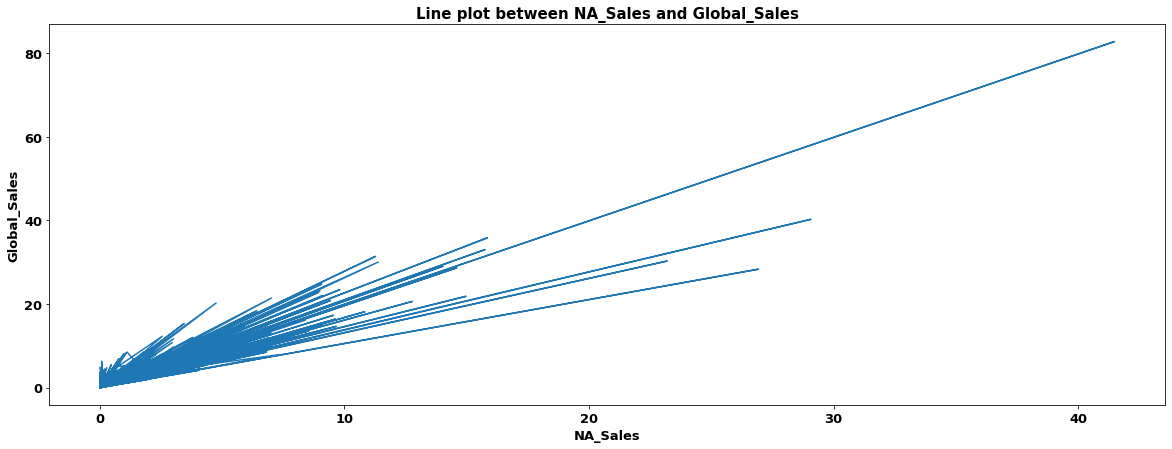

In [ ]:
# NA_Sales and Global_Sales has highest correlation between them so creating line plot between them
plt.figure(figsize= (20, 7))
plt.plot(data['NA_Sales'], data['Global_Sales'])
plt.title('Line plot between NA_Sales and Global_Sales', fontsize= 15, fontweight= 'bold')
plt.xlabel('NA_Sales', fontsize= 13, fontweight= 'bold')
plt.ylabel('Global_Sales', fontsize= 13, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.show()

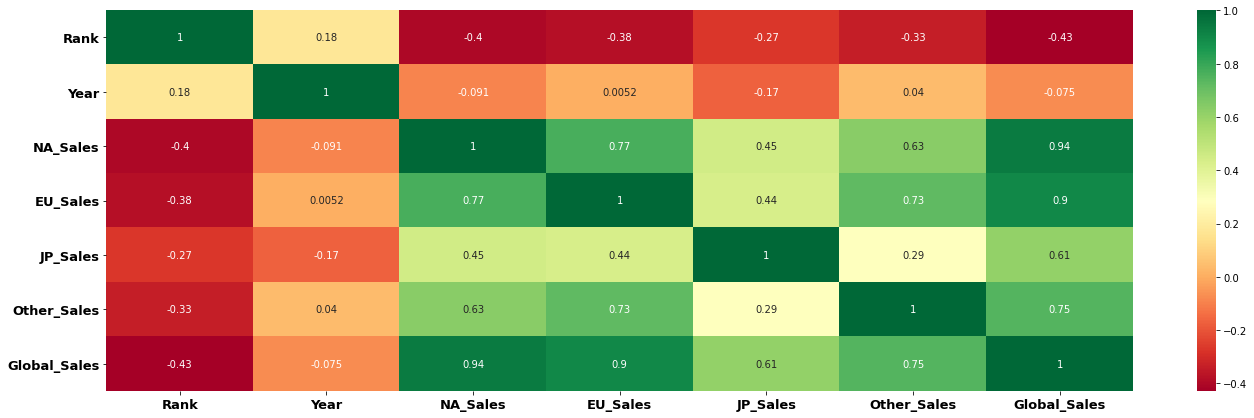

In [ ]:
# Correlation heatmap
plt.figure(figsize= (23, 7))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(rotation= 0, fontsize= 13, fontweight= 'bold')
plt.show()

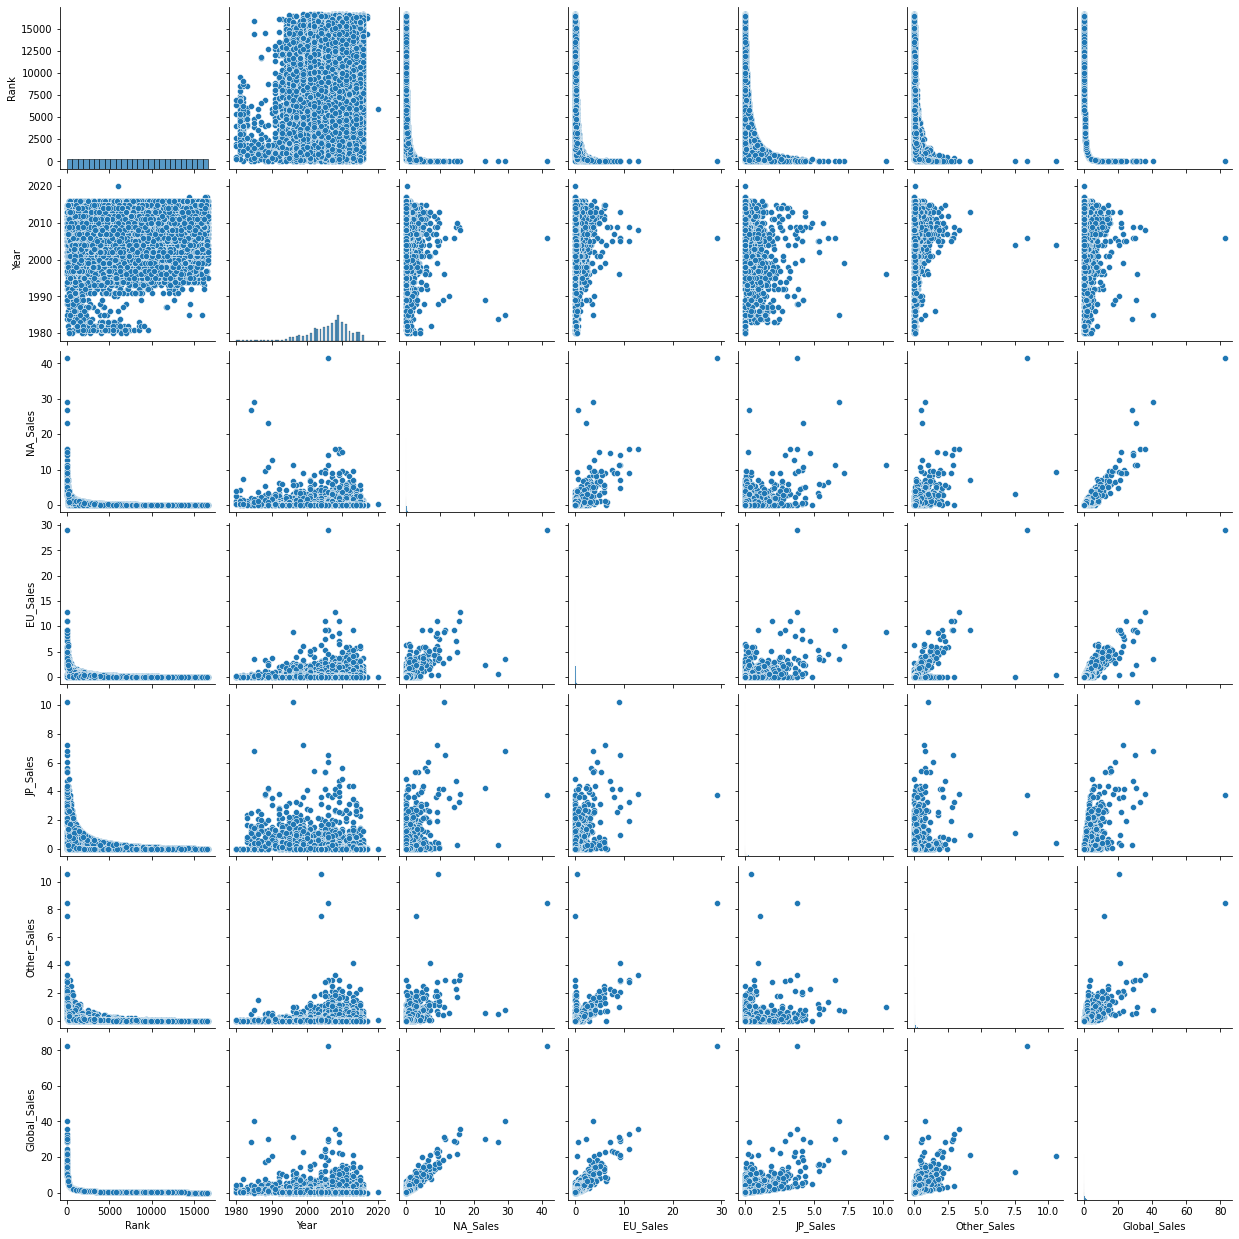

In [ ]:
# Pairplot
seaborn.pairplot(data)
plt.show()

In [ ]:
features= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target= ['Global_Sales']
x= data[features]
y= data[target]

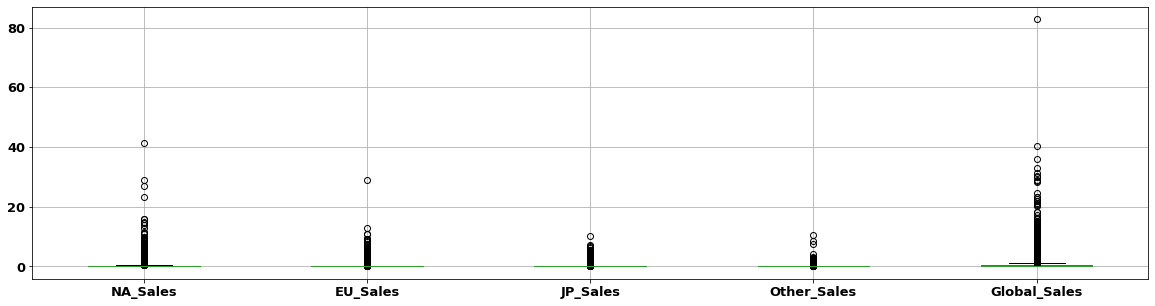

In [ ]:
# Boxplot for 
plt.figure(figsize= (20, 5))
boxplot_features= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
data[boxplot_features].boxplot()
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1)
print('Independent train set shape is :', x_train.shape)
print('Dependent train set shape is :', y_train.shape)
print('Independent test set shape is :', x_test.shape)
print('Dependent test set shape is :', y_test.shape)

Independent train set shape is : (14938, 4)
Dependent train set shape is : (14938, 1)
Independent test set shape is : (1660, 4)
Dependent test set shape is : (1660, 1)


In [ ]:
# Decision Tree Regressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred= dtr.predict(x_test)
dtr_train_accuracy= (r2_score(y_train, dtr.predict(x_train) ) ) *100
dtr_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', dtr_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', dtr_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

Training set accuracy % is : 100.0
Testing set accuracy % is : 96.707
Mean absolute error is : 0.039
Mean squared error is : 0.063
Root mean squared error is : 0.251


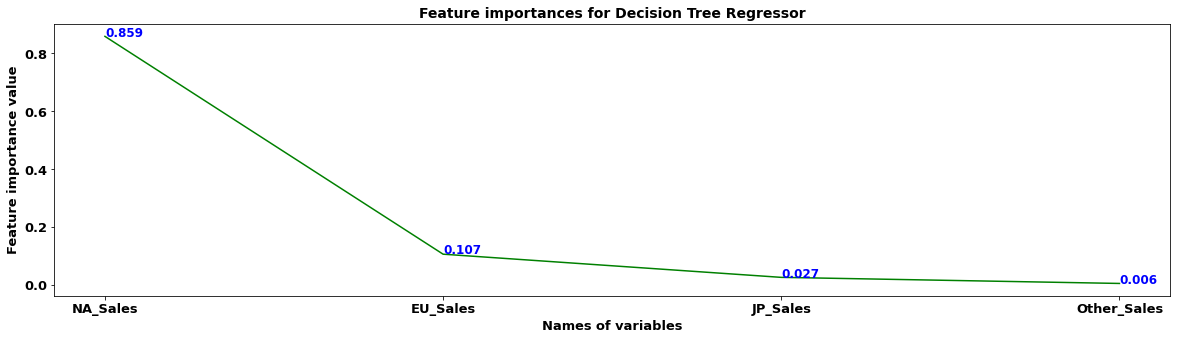

In [ ]:
# Feature importances for Decision Tree Regressor
plt.figure(figsize= (20, 5))
feature_importances= dtr.feature_importances_.round(decimals= 3)
plt.plot(features, feature_importances, color= 'green')
for x, y in zip(features, feature_importances ):
  plt.text(x, y, str(y), fontsize= 12, fontweight= 'bold', color= 'blue')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.title('Feature importances for Decision Tree Regressor', fontsize= 14, fontweight= 'bold')
plt.xlabel('Names of variables', fontsize= 13, fontweight= 'bold')
plt.ylabel('Feature importance value', fontsize= 13, fontweight= 'bold')
plt.show()

In [ ]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
lr_train_accuracy= (r2_score(y_train, lr.predict(x_train) ) ) *100
lr_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', lr_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', lr_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

Training set accuracy % is : 99.999
Testing set accuracy % is : 99.999
Mean absolute error is : 0.003
Mean squared error is : 0.0
Root mean squared error is : 0.005


In [ ]:
# AdaBoost Regressor
ada= AdaBoostRegressor(base_estimator= dtr, n_estimators= 5, learning_rate= 1)
ada.fit(x_train, y_train)
y_pred= ada.predict(x_test)
ada_train_accuracy= (r2_score(y_train, ada.predict(x_train) ) ) *100
ada_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', ada_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', ada_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set accuracy % is : 99.985
Testing set accuracy % is : 96.548
Mean absolute error is : 0.034
Mean squared error is : 0.066
Root mean squared error is : 0.257


In [ ]:
# Gradient Boosting Regressor
gbr= GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred= gbr.predict(x_test)
gbr_train_accuracy= (r2_score(y_train, gbr.predict(x_train) ) ) *100
gbr_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', gbr_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', gbr_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set accuracy % is : 99.92
Testing set accuracy % is : 98.07
Mean absolute error is : 0.029
Mean squared error is : 0.037
Root mean squared error is : 0.192


In [ ]:
# XG Boost Regressor
xgb= XGBRegressor()
xgb.fit(x_train, y_train)
y_pred= xgb.predict(x_test)
xgb_train_accuracy= (r2_score(y_train, xgb.predict(x_train) ) ) *100
xgb_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', xgb_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', xgb_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

[07:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training set accuracy % is : 99.869
Testing set accuracy % is : 96.951
Mean absolute error is : 0.037
Mean squared error is : 0.058
Root mean squared error is : 0.241


In [ ]:
# Cat Boost Regressor
cbr= CatBoostRegressor()
cbr.fit(x_train, y_train)
y_pred= cbr.predict(x_test)
cbr_train_accuracy= (r2_score(y_train, cbr.predict(x_train) ) ) *100
cbr_test_accuracy= (r2_score(y_test, y_pred)) *100
print('Training set accuracy % is :', cbr_train_accuracy.round(decimals= 3) )
print('Testing set accuracy % is :', cbr_test_accuracy.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3) )

Learning rate set to 0.063157
0:	learn: 1.5011288	total: 51.5ms	remaining: 51.5s
1:	learn: 1.4346663	total: 54.8ms	remaining: 27.4s
2:	learn: 1.3722188	total: 58.1ms	remaining: 19.3s
3:	learn: 1.3152082	total: 61.3ms	remaining: 15.3s
4:	learn: 1.2616241	total: 64.6ms	remaining: 12.9s
5:	learn: 1.2093238	total: 68ms	remaining: 11.3s
6:	learn: 1.1638720	total: 71ms	remaining: 10.1s
7:	learn: 1.1182400	total: 74.3ms	remaining: 9.21s
8:	learn: 1.0726392	total: 77.6ms	remaining: 8.54s
9:	learn: 1.0300257	total: 80.9ms	remaining: 8.01s
10:	learn: 0.9912683	total: 84ms	remaining: 7.55s
11:	learn: 0.9566522	total: 87.2ms	remaining: 7.18s
12:	learn: 0.9217723	total: 90.3ms	remaining: 6.86s
13:	learn: 0.8880618	total: 93.5ms	remaining: 6.58s
14:	learn: 0.8562853	total: 98.3ms	remaining: 6.45s
15:	learn: 0.8262201	total: 103ms	remaining: 6.36s
16:	learn: 0.7991490	total: 107ms	remaining: 6.18s
17:	learn: 0.7754034	total: 110ms	remaining: 6s
18:	learn: 0.7522446	total: 113ms	remaining: 5.85s
19:	l

In [ ]:
model_names= ['Decision Tree', 'Linear Regression', 'AdaBoost Regressor', 'Gradient Boosting Regressor', 'XG Boost Regressor', 'Cat Boost Regressor']
train_accuracies= [dtr_train_accuracy, lr_train_accuracy, ada_train_accuracy, gbr_train_accuracy, xgb_train_accuracy, cbr_train_accuracy]
test_accuracies= [dtr_test_accuracy, lr_test_accuracy, ada_test_accuracy, gbr_test_accuracy, xgb_test_accuracy, cbr_test_accuracy]
df= pandas.DataFrame({'Model names' : model_names, 'Train accuracy scores' : train_accuracies, 'Test accuracy scores' : test_accuracies}).round(decimals= 3)
df

,Model names,Train accuracy scores,Test accuracy scores
0,Decision Tree,100.000,96.707
1,Linear Regression,99.999,99.999
2,AdaBoost Regressor,99.985,96.548
3,Gradient Boosting Regressor,99.920,98.070
4,XG Boost Regressor,99.869,96.951
5,Cat Boost Regressor,99.992,91.121


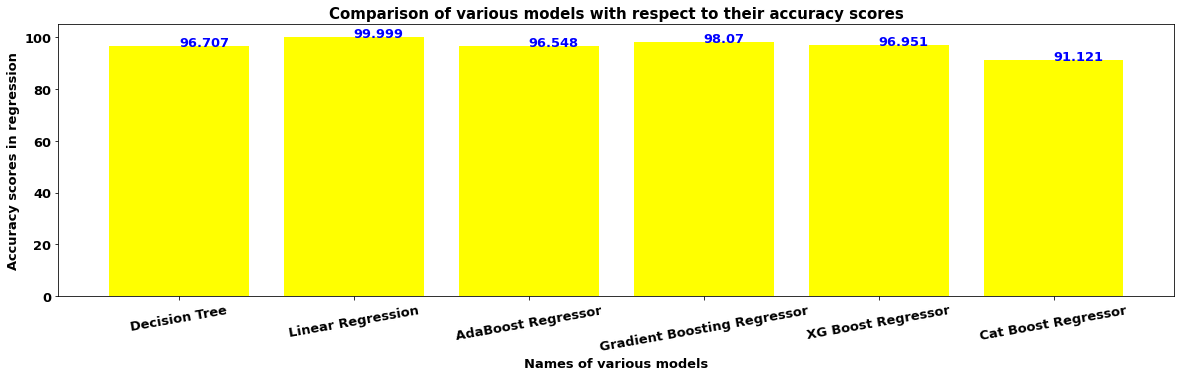

In [ ]:
plt.figure(figsize= (20, 5))
plt.bar( df['Model names'], df['Test accuracy scores'], color= 'yellow' )
plt.title('Comparison of various models with respect to their accuracy scores', fontsize= 15, fontweight= 'bold')
plt.xlabel('Names of various models', fontsize= 13, fontweight= 'bold')
plt.ylabel('Accuracy scores in regression', fontsize= 13, fontweight= 'bold')
plt.xticks(rotation= 10, fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
for x, y in zip( df['Model names'], df['Test accuracy scores'] ):
  plt.text(x, y, str(y), fontsize= 13, fontweight= 'bold', color= 'blue' )
plt.show()

In [ ]:
# Predicting output value from our model : Using values from the dataframe at index number : 15
# Using Linear regression due to its high r2 score
NA_Sales= data['NA_Sales'][15]
EU_Sales= data['EU_Sales'][15]
JP_Sales= data['JP_Sales'][15]
Other_Sales= data['Other_Sales'][15]
input= [NA_Sales, EU_Sales, JP_Sales, Other_Sales]
print('Actual value of Global Sales given in dataframe :', data['Global_Sales'][15] )
print('Predicted value of Global Sales from the model :', lr.predict([input]).round(decimals= 3) )

Actual value of Global Sales given in dataframe : 21.82
Predicted value of Global Sales from the model : [[21.818]]


In [ ]:
# Predicting output value from our model : Using different values other than from the dataframe
NA_Sales= 9.98
EU_Sales= 7.78
JP_Sales= 4.32
Other_Sales= 1.84
input= [NA_Sales, EU_Sales, JP_Sales, Other_Sales]
print('Predicted value of Global Sales from the model :', lr.predict([input]).round(decimals= 3) )

Predicted value of Global Sales from the model : [[23.919]]
